In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('data/full_incl_temp.csv')
print(df.shape, df.columns)
df['temp']= df['temp']-272
df['weekend'] = (df['datetimeDayofweek'] >4).astype(float)
df.head().T

(44566, 50) Index(['Logische Periode ', ' Endzeitstempel ', ' Status ', ' Tarif ',
       'location', 'adress', 'datetime', 'Wert', 'temp', 'temp_hamburg',
       'temp_dresden', 'temp_berlin', 'datetimeYear', 'datetimeMonth',
       'datetimeWeek', 'datetimeDay', 'datetimeDayofweek', 'datetimeDayofyear',
       'datetimeHour', 'datetimeMinute', 'datetimeSecond', 'datetimeElapsed',
       'lat', 'long', 'city', '48-lag', '24-lag', 'dif', 'temp.1', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'rain_24h',
       'rain_today', 'snow_1h', 'snow_3h', 'snow_24h', 'snow_today',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')


,0,1,2,3,4
Logische Periode,08.01.2019,08.01.2019,08.01.2019,08.01.2019,08.01.2019
Endzeitstempel,07:00:00,07:00:00,07:00:00,07:00:00,07:00:00
Status,W,W,W,W,W
Tarif,tariflos,tariflos,tariflos,tariflos,tariflos
location,Joachim-Karnatz-Allee,Tharandter Str.,Lüttkamp,Flughafenstr.,Triftstr.
adress,"10725 Berlin, Joachim-Karnatz-Allee 43","Tharandter Str. 48, 01159 Dresden","22715 Hamburg, Lüttkamp 5","22583 Hamburg, Flughafenstr. 7412","13296 Berlin, Triftstr. 31"
datetime,2019-01-08 07:00:00,2019-01-08 07:00:00,2019-01-08 07:00:00,2019-01-08 07:00:00,2019-01-08 07:00:00
Wert,858.66,110.731,365.674,174.427,1191.33
temp,6.64,5.15,7.15,7.15,6.64
temp_hamburg,279.15,279.15,279.15,279.15,279.15


In [51]:
df['48-lag'] = df['48-lag'].astype(float)
df['dif'] = df['dif'].astype(float)
df['Wert'] = df['Wert'].astype(float)
df['temp'] = df['temp'].astype(float)

In [52]:
cols = ['Wert', 'location', 'datetimeMonth', 
        'datetimeDayofweek', 'datetimeDayofyear', 'datetimeHour',
         'datetimeElapsed',  '48-lag','temp',
        'weekend',
        'city',
        'pressure',
        'wind_speed',
        'weather_main'
       ]
df_tab = df[cols].dropna()
df_tab[df_tab.isnull().any(axis=1)]

,Wert,location,datetimeMonth,datetimeDayofweek,datetimeDayofyear,datetimeHour,datetimeElapsed,48-lag,temp,weekend,city,pressure,wind_speed,weather_main


In [53]:
valid_idx = [idx for idx,month,day in zip(range(len(df_tab)),list(df_tab.datetimeMonth),list(df_tab.datetimeDayofweek)) if ( np.random.rand()<.1)] 
print(len(valid_idx), len(df_tab), len(valid_idx)/len(df_tab))
print(df_tab[cols].shape)

4429 44126 0.10037166296514527
(44126, 14)


In [54]:
from fastai import *
from fastai.tabular import *
print(__version__)

1.0.57


In [56]:
print(len(valid_idx),df.shape)
cat_names = ['location','datetimeMonth','datetimeDayofweek','datetimeHour', 'city',
             'weather_main','weekend'
            ]
dep_var = 'Wert'

4429 (44566, 51)


In [57]:

procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df('data', df_tab, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [75]:
learn = tabular_learner(data,[1024,512],metrics=[mean_absolute_error,rmse],
#                         ,emb_szs={'City':5,'Country':5},
                        ps=[0.001,0.01], emb_drop=0.04,
                        callback_fns=ShowGraph
                       )

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


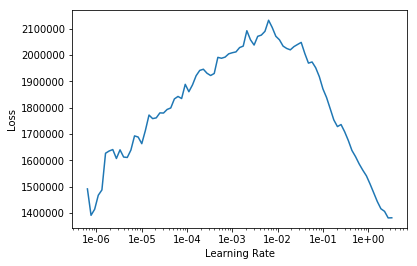

In [76]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,85326.000000,28043.857422,89.390457,150.012314,00:06


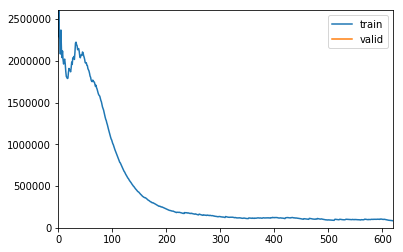

In [77]:
learn.fit_one_cycle(1,.05)

In [78]:
learn.validate()

[28043.857, tensor(89.3905), tensor(150.0123)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


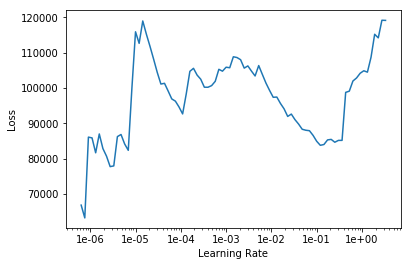

In [79]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,86165.429688,29965.220703,96.175285,155.561325,00:06
1,76595.843750,29469.826172,91.801399,152.935928,00:06
2,86682.718750,34316.460938,107.844551,167.129730,00:06


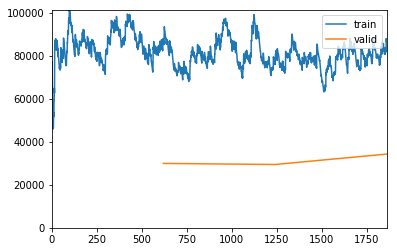

In [80]:
learn.fit(3,1e-5)

In [74]:
learn.validate()

[23191.447, tensor(82.6168), tensor(137.5023)]

In [72]:
learn.save('new_data_weekend')

In [34]:
learn.load('new_data');

In [290]:
np.log(df.dif+5).mean()

3.853784062949676

In [35]:
100-(learn.validate()[1]/df.dif.mean()).numpy()*100

19.636082649230957

In [36]:
100-(79.5499/95.44201567656432)*100

16.65106878130051

In [55]:
df_pred = df.loc[:,cols].dropna()
datatest = TabularList.from_df(df_pred, cat_names=cat_names,  procs=procs)
learn.data.add_test(datatest) 
# # print(learn.data)
preds, targets = learn.get_preds(DatasetType.Test)

tensor(737.5366) tensor(1166.5831)


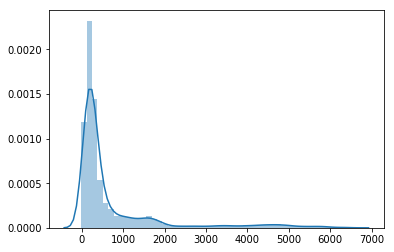

In [56]:
print(preds[:,0].mean(), preds[:,0].std())
sns.distplot(list(preds[:,0]))

In [58]:
df_pred['predicted'] = preds[:,0].numpy()
df_pred['predicted'].mean(), df_pred['predicted'].std()

(737.5403442382812, 1166.5848388671875)

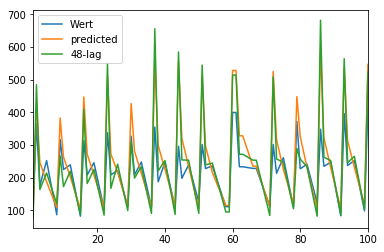

In [59]:
df_pred.loc[:100,['Wert','predicted','48-lag']].plot()

In [87]:
df_pred['dif_tako_abs'] = abs(df_pred['predicted'] - df_pred['Wert'])
df_pred['dif_guido_abs'] = abs(df_pred['48-lag'] - df_pred['Wert'])
df_pred['dif_tako'] = df_pred['predicted'] - df_pred['Wert']
df_pred['dif_guido'] = df_pred['48-lag'] - df_pred['Wert']
print(df_pred['dif_tako_abs'].mean(),df_pred['dif_guido_abs'].mean(),100*(1-df_pred['dif_tako_abs'].mean()/df_pred['dif_guido_abs'].mean()))

89.18676368413351 109.04227052078267 18.2089998143104


In [92]:
df_pred.to_csv('predicted_new_data.csv',index=False)

In [83]:
def get_long(val):
    # 5 = 755 - 750
    a = val['pred'] - val['target']
    if a > 0:
        return a
    return 0

def get_short(val):
    # -5 = 750 - 755
    a = val['pred'] - val['target']
    if a < 0:
        return -a
    return 0

def sep_long_short(df,pred='predicted',target='Wert'):
    df_ = df.rename(columns={pred:'pred',target:'target'})
    df_['long'] = df_[['pred','target']].apply(get_long,1)
    df_['short'] = df_[['pred','target']].apply(get_short,1)
    return df_[['long','short']]

df_pred[['long_tako','short_tako']] =sep_long_short(df_pred,'predicted')
df_pred[['long_48','short_48']] =sep_long_short(df_pred,'48-lag')

In [91]:
df_pred.head().T

,1,2,3,5,8
Wert,110.731,365.674,174.427,252.154,86.006
location,Tharandter Str.,Lüttkamp,Flughafenstr.,Wilhelmsburger Str.,Tharandter Str.
datetimeMonth,1,1,1,1,1
datetimeDayofweek,1,1,1,1,1
datetimeDayofyear,8,8,8,8,8
datetimeHour,7,7,7,7,8
datetimeElapsed,1546930800,1546930800,1546930800,1546930800,1546934400
city,Oschatz,Hamburg Fuhlsbuettel,Hamburg Fuhlsbuettel,Hamburg Fuhlsbuettel,Oschatz
48-lag,76.328,484.66,163.402,213.95,119.331
temp,5.15,7.15,7.15,7.15,5.15


In [95]:
df_day = df_pred.groupby(['datetimeDayofyear','location']).sum()
df_day.head().T

datetimeDayofyear               3              4                \
location          Tharandter Str. Flughafenstr.      Lüttkamp    
Wert                 1.756711e+03   7.618476e+03  1.790382e+04   
datetimeMonth        1.700000e+01   3.500000e+01  3.500000e+01   
datetimeDayofweek    5.100000e+01   1.400000e+02  1.400000e+02   
datetimeHour         2.550000e+02   4.590000e+02  4.590000e+02   
datetimeElapsed      2.629097e+10   5.413125e+10  5.413125e+10   
48-lag               1.306243e+03   7.346644e+03  1.539870e+04   
temp                -8.450000e+00   2.012200e+02  2.012200e+02   
predicted            1.854871e+03   1.064236e+04  1.739542e+04   
dif_tako             9.816028e+01   3.023881e+03 -5.083990e+02   
dif_guido           -4.504680e+02  -2.718320e+02 -2.505113e+03   
long_tako            1.501251e+02   3.023881e+03  1.932294e+03   
short_tako           5.196486e+01   0.000000e+00  2.440693e+03   
long_48              0.000000e+00   1.395150e+02  2.286797e+03   
short_48             4.504680e+02   4.113470e+02  4.791910e+03   
dif_tako_abs         2.020900e+02   3.023881e+03  4.372986e+03   
dif_guido_abs        4.504680e+02   5.508620e+02  7.078707e+03   

datetimeDayofyear                                       
location          Tharandter Str. Wilhelmsburger Str.   
Wert                 4.093942e+03         8.462946e+03  
datetimeMonth        4.200000e+01         3.500000e+01  
datetimeDayofweek    1.680000e+02         1.400000e+02  
datetimeHour         4.800000e+02         4.590000e+02  
datetimeElapsed      6.495725e+10         5.413125e+10  
48-lag               3.790834e+03         8.178035e+03  
temp                 2.130000e+01         2.012200e+02  
predicted            4.567824e+03         7.909901e+03  
dif_tako             4.738822e+02        -5.530450e+02  
dif_guido           -3.031080e+02        -2.849110e+02  
long_tako            5.702889e+02         9.357209e+00  
short_tako           9.640670e+01         5.624022e+02  
long_48              1.386880e+02         8.298100e+01  
short_48             4.417960e+02         3.678920e+02  
dif_tako_abs         6.666956e+02         5.717594e+02  
dif_guido_abs        5.804840e+02         4.508730e+02

In [97]:
df_day.columns

Index(['Wert', 'datetimeMonth', 'datetimeDayofweek', 'datetimeHour',
       'datetimeElapsed', '48-lag', 'temp', 'predicted', 'dif_tako',
       'dif_guido', 'long_tako', 'short_tako', 'long_48', 'short_48',
       'dif_tako_abs', 'dif_guido_abs'],
      dtype='object')

In [98]:
df_day[['Wert', '48-lag', 'temp', 'predicted', 'dif_tako',
       'dif_guido', 'long_tako', 'short_tako', 'long_48', 'short_48',
       'dif_tako_abs', 'dif_guido_abs']].mean()

Wert             18677.621176
48-lag           18784.066090
temp               344.139742
predicted        19464.438871
dif_tako           786.817679
dif_guido          106.444913
long_tako         1570.279394
short_tako         783.461715
long_48           1492.097824
short_48          1385.652911
dif_tako_abs      2353.741109
dif_guido_abs     2877.750735
dtype: float64

In [78]:
a = a/3.6

In [79]:
a/1000000

98.68178866266666